In [1]:
import numpy as np
import pandas as pd

In [2]:
from sklearn import metrics

In [3]:
import random

In [4]:
np.random.seed(42)

In [5]:
random.seed(42)

# Base

In [6]:
# Importando a base
train = pd.read_csv('train_treated.csv', index_col=0)

In [7]:
train.sample(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
709,710,1,3,0,29.699118,1,1,15.2458,1,0,0
439,440,0,2,0,31.000000,0,0,10.5000,0,0,1
840,841,0,3,0,20.000000,0,0,7.9250,0,0,1
720,721,1,2,1,6.000000,0,1,33.0000,0,0,1
39,40,1,3,1,14.000000,1,0,11.2417,1,0,0
290,291,1,1,1,26.000000,0,0,78.8500,0,0,1
300,301,1,3,1,29.699118,0,0,7.7500,0,1,0
333,334,0,3,0,16.000000,2,0,18.0000,0,0,1
208,209,1,3,1,16.000000,0,0,7.7500,0,1,0
136,137,1,1,1,19.000000,0,2,26.2833,0,0,1


## Dividindo entre treino e teste

In [8]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(train.drop(columns=['Survived']), train['Survived'], test_size=0.25, random_state=0)

In [9]:
# Removendo sex
x_train_nosex, x_test_nosex, y_train_nosex, y_test_nosex = train_test_split(train.drop(columns=['Survived', 'Sex']), train['Survived'], test_size=0.25, random_state=0)

# Linear Regression

In [10]:
# Importando
from sklearn.linear_model import LinearRegression
# Instanciando com default
linearR_default = LinearRegression()

In [11]:
# Treinando e prevendo
linearR_default.fit(x_train, y_train)
linearR_predict = linearR_default.predict(x_test)

In [12]:
linearR_predict.round()

array([ 0.,  0.,  0.,  1.,  1.,  0.,  1.,  1.,  0.,  1.,  0.,  1.,  0.,
        1.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  1.,  1.,
        0.,  1.,  1.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,
        1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,  1.,  0.,  1.,
        0.,  1.,  0.,  1.,  1.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,
        0.,  0.,  0.,  0.,  1.,  0.,  0.,  1.,  1.,  0.,  1.,  1.,  0.,
        0.,  0.,  1.,  1.,  0.,  1.,  0.,  0.,  1., -0.,  0.,  0.,  0.,
        1.,  1.,  1.,  1.,  0.,  1., -0.,  1.,  0.,  1.,  0.,  1.,  1.,
        1.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        1.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,
        1.,  1.,  1.,  0.,  1.,  1.,  0.,  0.,  1.,  1.,  0.,  1.,  0.,
        1.,  0.,  1.,  1.,  0.,  0.,  1.,  0.,  0.,  0., -0.,  0.,  0.,
        0., -0.,  1.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,  1.,  0

In [13]:
linearR_default.coef_

array([-1.33441495e-05, -1.59145946e-01,  5.10781939e-01, -5.84794709e-03,
       -4.47368884e-02, -8.33939532e-03,  2.51828408e-04, -1.03208768e-01,
       -1.05325243e-01, -1.67815868e-01])

In [14]:
linearR_accuracy = metrics.accuracy_score(linearR_predict.round(), y_test)
linearR_accuracy

0.7802690582959642

In [15]:
# Treinando e prevendo (SEM SEX)
linearR_default.fit(x_train_nosex, y_train_nosex)
linearR_predict = linearR_default.predict(x_test_nosex)

In [16]:
linearR_nosex_accuracy = metrics.accuracy_score(linearR_predict.round(), y_test_nosex)
linearR_nosex_accuracy

0.7354260089686099

# Logistic Regression

In [17]:
# Importando
from sklearn.linear_model import LogisticRegression
# Instanciando
logisticR = LogisticRegression(max_iter=700)

In [18]:
# Treinando e prevendo
logisticR.fit(x_train, y_train)
logisticR_predict = logisticR.predict(x_test)

In [19]:
logisticR_accuracy = metrics.accuracy_score(logisticR_predict, y_test)
logisticR_accuracy

0.7937219730941704

In [20]:
# Treinando e prevendo (SEM SEX)
logisticR.fit(x_train_nosex, y_train_nosex)
logisticR_predict = logisticR.predict(x_test_nosex)

C:\Users\Giulia\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [21]:
logisticR_nosex_accuracy = metrics.accuracy_score(logisticR_predict.round(), y_test_nosex)
logisticR_nosex_accuracy

0.7399103139013453

# Máquina de Vetor Suporte

In [22]:
# Importando
from sklearn.svm import SVC
# Instanciando
supportV = SVC()

In [23]:
# Treinando e prevendo
supportV.fit(x_train, y_train)
supportV_predict = supportV.predict(x_test)

In [24]:
supportV_accuracy = metrics.accuracy_score(supportV_predict, y_test)
supportV_accuracy

0.6636771300448431

# Decision tree

In [26]:
# Importando
from sklearn.tree import DecisionTreeClassifier
# Instanciando
decisionT = DecisionTreeClassifier(random_state=42)

In [27]:
# Treinando e prevendo
decisionT.fit(x_train, y_train)
decisionT_predict = decisionT.predict(x_test)

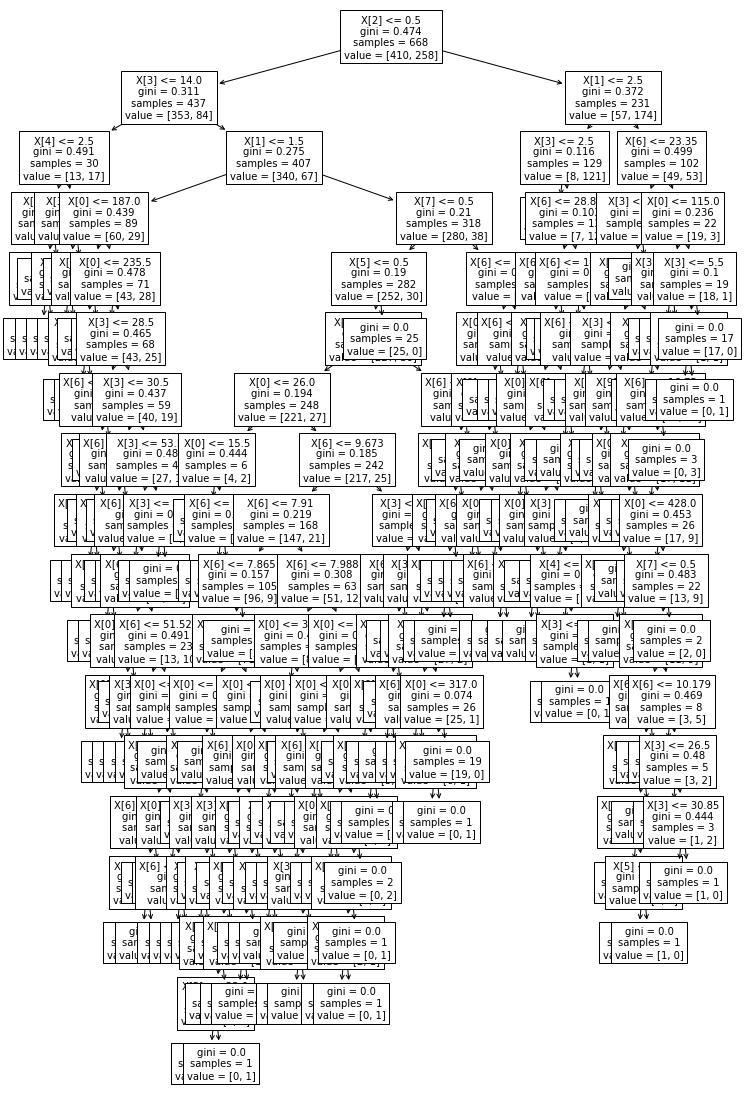

In [28]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

fig, ax = plt.subplots(figsize=(12, 20))
plot_tree(decisionT, fontsize=10)
plt.show()

In [29]:
decisionT_accuracy = metrics.accuracy_score(decisionT_predict, y_test)
decisionT_accuracy

0.7713004484304933

# Redes Neurais

In [30]:
# Importando
from sklearn.neural_network import MLPClassifier
# Instanciando
neuralN = MLPClassifier(random_state=42)

In [31]:
# Treinando e prevendo
neuralN.fit(x_train, y_train)
neuralN_predict = neuralN.predict(x_test)

In [32]:
neuralN_accuracy = metrics.accuracy_score(neuralN_predict, y_test)
neuralN_accuracy

0.7668161434977578

# Scores

In [33]:
scores = pd.DataFrame({
    'Model': ['Linear', 'Logistic', 'SVM', 'Decision Tree', 'Neural Network'],
    'Score': [ linearR_accuracy, logisticR_accuracy, supportV_accuracy, decisionT_accuracy, neuralN_accuracy]
})
scores.sort_values(by='Score', ascending=False)

,Model,Score
1,Logistic,0.793722
0,Linear,0.780269
3,Decision Tree,0.771300
4,Neural Network,0.766816
2,SVM,0.663677
